In [98]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Geospatial Basics

In this notebook we'll look at using geospatial data, or data that contains some geographic information. 

## Geopandas

Geopandas is a library that extends the popular Pandas library to allow for easy manipulation of geospatial data. It mostly works like a regular dataframe, with the exception of having more geospatial functionality. We can make geo dataframes from spatial specific data types like shapefiles, or from regular dataframes with columns that contain geospatial data.

<b>Note:</b> you might need to install geopandas. This can cause issues with dependencies, so I'd recommend copying the environment then installing it there. The command to copy the environment is `conda create --name new_env_name --clone old_env_name`, then the command to active that environment is `conda activate new_env_name`. Once you're in the new environment you can install geopandas with `conda install -c conda-forge geopandas`. This isn't required, but if there's some weird issue, this can save you some headaches. 

### Geo Dataframes

Geo dataframes are just like regular dataframes, but with a little additional functionality to make them geospatial friendly. The most prevelant difference is the 'geometry' column, which is a specially labeled column that contains the geospatial data. For example, if we have a dataframe of cities, the geometry column would contain the latitude and longitude of the city, if we have a dataframe of countries, the geometry column would contain the shape of the country, etc...

We can generally read csv data into a pandas dataframe then make it into a geodataframe by specifying the geometry column, we can also read the data directly into a geodataframe. Pandas gives us a bit more power and flexibility in manipulating and reading different types of data, so if we have lots of work to do it might be easier to start with a pandas dataframe then convert it to a geodataframe. In the end, it doesn't matter, we just need the data prepared. 

### Processing Data and Encoding Geospatial Data

Geospatial data, like the values we get in our 'geometry' column, can be encoded in a few different ways. The most common are WKT (Well Known Text), WKB (Well Known Binary), and GeoJSON. These are all ways to represent the same data, but in different formats. We can convert between these formats using the `shapely` library, which is a dependency of geopandas.

We don't really worry about this much here. If you're processing large amounts of geopspatial data you may need to deal with this, but for the most part we can just use the geopandas functions to do the work for us.

In [99]:
#schools = gpd.read_file('../data/Schools.csv')
schools = pd.read_csv('../data/Schools.csv')
booze = gpd.read_file('../data/Alcohol_Sales_Licences.csv')
hoods = gpd.read_file('../data/Neighbourhood_Boundaries.csv')

In [100]:
hoods.head()

,Neighbourhood Number,Friendly Name,Description,geom,geometry
0,2260,Evansdale,"Evansdale is named for H.M.E. Evans, Mayor of ...",MULTIPOLYGON (((-113.47970029870794 53.6152271...,None
1,2580,Northmount,Residential land accounts for almost 70 percen...,MULTIPOLYGON (((-113.48510468465751 53.6063060...,None
2,1170,Prince Rupert,Prince Rupert lies within the old Hudson Bay C...,MULTIPOLYGON (((-113.51740826792107 53.5646264...,None
3,1230,Spruce Avenue,Spruce Avenue's central location has attracted...,MULTIPOLYGON (((-113.51230654891363 53.5624829...,None
4,1250,Westwood,The character of Westwood has changed consider...,MULTIPOLYGON (((-113.4922573373992 53.57661667...,None


In [101]:
schools.sort_values(by="Latitude", ascending=True)

,Year,attend_no,attend,AbEd_ID,EPSB_ID,School_Nam,Sch_Type,Grades,Sch_Addres,Sch_City,Sch_Postal,School_Web,School_EMa,School_Pho,Latitude,Longitude,Sector,epsb_ward,max_year,Catchment Polygon
173,2021,930,David Thomas King,1930.0,930.0,David Thomas King,EJ,K to Gr 9,22707 - 97 Avenue NW,Edmonton,T5T5X7,http://davidthomasking.epsb.ca,davidthomasking@epsb.ca,(587) 489-4706,-113.706834,53.536459,Northwest,EPSB WARD C,True,MULTIPOLYGON (((-113.68878162161262 53.5266776...
74,2021,930,David Thomas King,1930.0,930.0,David Thomas King,EJ,K to Gr 9,22707 - 97 Avenue NW,Edmonton,T5T5X7,http://davidthomasking.epsb.ca,davidthomasking@epsb.ca,(587) 489-4706,-113.706834,53.536459,Northwest,EPSB WARD C,True,MULTIPOLYGON (((-113.68878162161262 53.5266776...
144,2021,569,Winterburn,7569.0,569.0,Winterburn,EL,K to Gr 6,9527 Winterburn Road NW,Edmonton,T5T5X9,http://winterburn.epsb.ca,winterburn@epsb.ca,(780) 447-3566,-113.688397,53.534893,Northwest,EPSB WARD C,True,MULTIPOLYGON (((-113.67664682154536 53.4831403...
70,2021,925,Kim Hung,1925.0,925.0,Kim Hung,EJ,K to Gr 9,1950 Glastonbury Boulevard NW,Edmonton,T5T6M6,http://kimhung.epsb.ca,kimhung@epsb.ca,(587) 489-4718,-113.683119,53.502596,West,EPSB WARD E,True,MULTIPOLYGON (((-113.66420234216477 53.4937806...
75,2021,925,Kim Hung,1925.0,925.0,Kim Hung,EJ,K to Gr 9,1950 Glastonbury Boulevard NW,Edmonton,T5T6M6,http://kimhung.epsb.ca,kimhung@epsb.ca,(587) 489-4718,-113.683119,53.502596,West,EPSB WARD E,True,MULTIPOLYGON (((-113.66420234216477 53.4937806...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2021,E10,Glenora / Grovenor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,MULTIPOLYGON (((-113.5657022389138 53.54292847...
125,2021,J01,Allendale / McKernan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,MULTIPOLYGON (((-113.50630292113384 53.5477776...
203,2021,J02,Bessie Nichols / Kim Hung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,MULTIPOLYGON (((-113.6673281213683 53.49381433...
210,2021,E12,Aleda Patterson (K-3)/Alex Janvier (4-6),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,MULTIPOLYGON (((-113.57806732261442 53.5417053...


### Plotting Geo Dataframes

Plotting geo dataframes is pretty easy, we can just use the plot() function call in most cases - this will plot the geometry column of the dataframe. 

The plotting tools are based on the matplotlib library, which is the basis of many visualization libraries such as seaborn. The details of controlling matplotlib plots can be a bit annoying and inconvenient, but we can ultimately do almost anything we want with the plots. For normal uses, we can stick to the defaults, or slight variations; for presentation purposes, we might want to spice it up a bit. 

#### Styling Plots

The maps that we get are functional, but definitely less pretty than what we get with fancy modern tools like Google Maps. We don't have a direct way to make things pretty, but we can use some things like color, transparency, marker style, and size to make the plots more visually appealing. 

<b>Note:</b> there are a few examples of me making new points from latitude and longitude instead of using the existing points. This is part for demonstration, and part because the existing ones gave a few errors and I didn't want to spend too much time figuring out why. It is almost certainly due to some difference such as the encoding system (more on this later), but it isn't a big deal. 

In [102]:
booze.head()

,Name,Business Description,Category,Zoning,Address,Neighbourhood ID,Latitude,Longitude,Point,geometry
0,CROMDALE LIQUOR STORE,Alcohol Sales,Alcohol Sales (Consumption Off Premises),"RA7, CB2",11723 - 82 STREET NW,1160,53.56965444785372,-113.4663962,POINT (-113.466396197168 53.569654447854),None
1,G & R LIQUOR MART,,Alcohol Sales (Consumption Off Premises),CMU,9906 - 109 STREET NW,1090,53.537570925020994,-113.5087635,POINT (-113.508763462947 53.537570925021),None
2,ACE LIQUOR DISCOUNTER AT SUMMERSIDE,Liquor Store,Alcohol Sales (Consumption Off Premises),CSC,1124 - 91 STREET SW,6214,53.42368025,-113.4755922,POINT (-113.475592152867 53.423680250415),None
3,SAFEWAY WINE & SPIRITS,Retail Liquor Store,"Alcohol Sales (Consumption Off Premises), Mino...",CSC,12807 - 140 AVENUE NW,3340,53.60105688,-113.5429659,POINT (-113.542965892923 53.601056880845),None
4,ACE LIQUOR DISCOUNTER AT FOREST HEIGHTS,Liquor Store,Alcohol Sales (Consumption Off Premises),DC2,7842 - 106 AVENUE NW,6230,53.54963823458446,-113.4488054,POINT (-113.448805403741 53.549638234584),None


<Axes: >

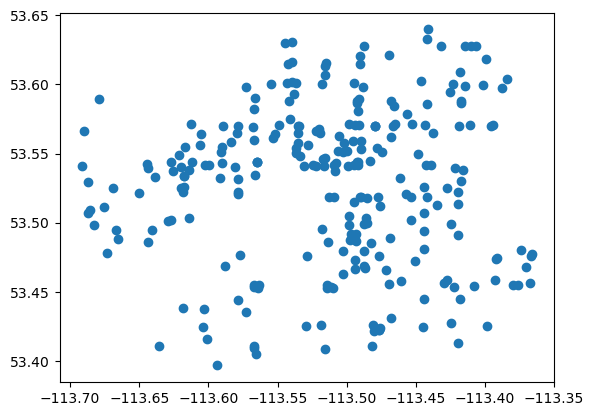

In [103]:
booze.head()
booze['geometry'] = gpd.points_from_xy(booze['Longitude'], booze['Latitude'])
booze.set_geometry('geometry', inplace=True)
booze.plot()

#### Add A Basemap

We can add a basemap to our plots to make them look more like a real map. 

<b>Note:</b> the from_wkt function is something that is commonly used, and rarely thought about. It is a function that converts a WKT string into a shapely object, which is what our geometry column is. This command basically just translates, there are a few equivalents if the data is in a different format.

In [104]:
hoods.head()

,Neighbourhood Number,Friendly Name,Description,geom,geometry
0,2260,Evansdale,"Evansdale is named for H.M.E. Evans, Mayor of ...",MULTIPOLYGON (((-113.47970029870794 53.6152271...,None
1,2580,Northmount,Residential land accounts for almost 70 percen...,MULTIPOLYGON (((-113.48510468465751 53.6063060...,None
2,1170,Prince Rupert,Prince Rupert lies within the old Hudson Bay C...,MULTIPOLYGON (((-113.51740826792107 53.5646264...,None
3,1230,Spruce Avenue,Spruce Avenue's central location has attracted...,MULTIPOLYGON (((-113.51230654891363 53.5624829...,None
4,1250,Westwood,The character of Westwood has changed consider...,MULTIPOLYGON (((-113.4922573373992 53.57661667...,None


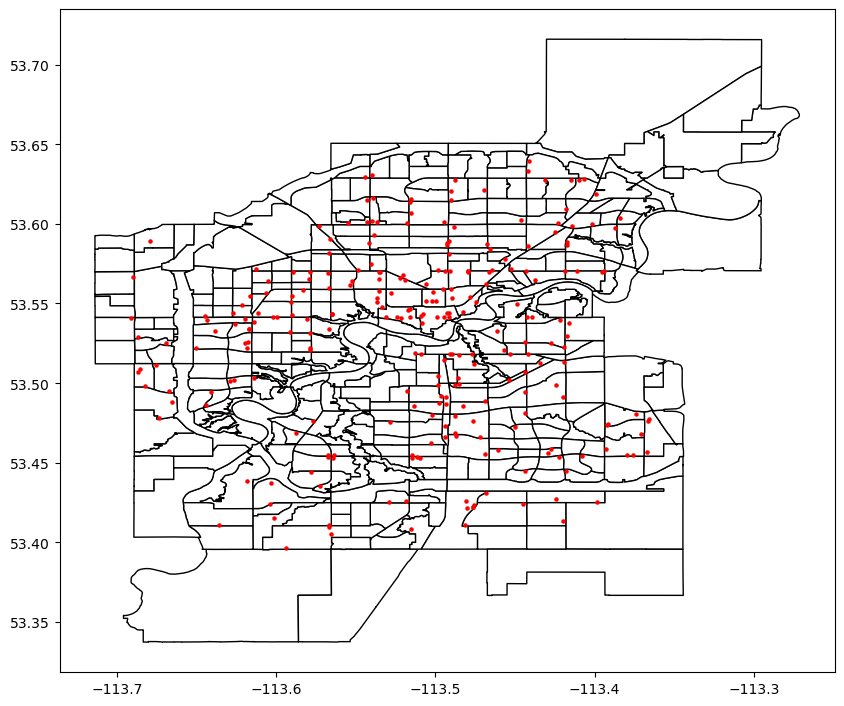

In [105]:
hoods['geometry'] = gpd.GeoSeries.from_wkt(hoods['geom'])
plot1 = hoods.plot( figsize=(10, 10), color='white', edgecolor='black')
plot2 = booze.plot(ax=plot1, color='red', markersize=5)

### Data Cleanup

There are a few things that we need to do to clean up the schools data, in particular, there appear to be some columns where the latitude and longitude are flipped. We'll need to fix this before we can plot the data, or we'll have things in the wrong place on the map!

<Axes: >

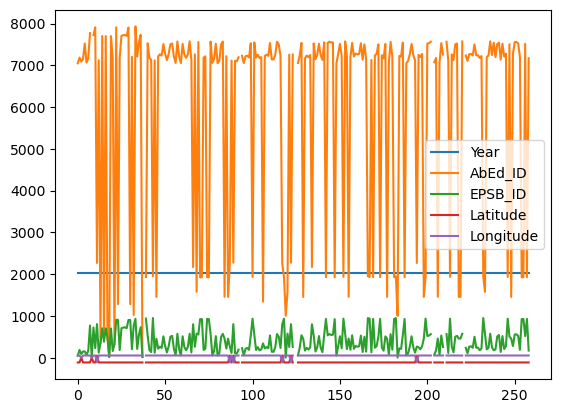

In [106]:
schools.plot()

In [107]:
schools['Latitude'] = schools['Latitude'].astype(float)
schools['Longitude'] = schools['Longitude'].astype(float)

In [108]:
def latLongFlipper(row):
    tmpRow = row
    lat = row['Latitude']
    long = row['Longitude']
    if lat < 0:
        tmpRow['Latitude'] = long
        tmpRow['Longitude'] = lat
    elif long > 0:
        tmpRow['Latitude'] = long
        tmpRow['Longitude'] = lat
    return tmpRow

In [109]:
schools = schools.apply(latLongFlipper, axis=1)

<Axes: >

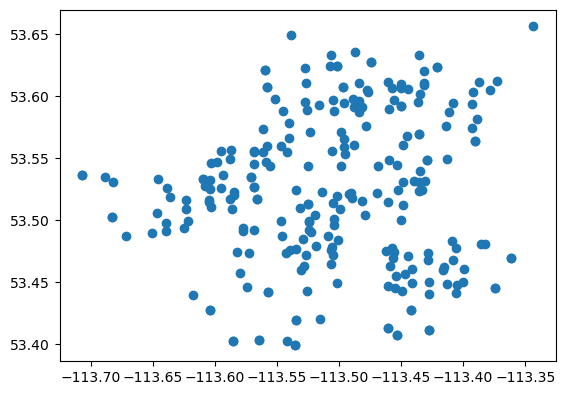

In [110]:

schools = schools[schools['Latitude'] > 50]
schools['school_location'] = gpd.points_from_xy(schools['Longitude'], schools['Latitude'])
schools = gpd.GeoDataFrame(schools, geometry='school_location')
schools.plot()

### With a Background

We can also layer on our points along with a background of neighborhoods, or in this case, the school catchment areas. In fact, we can layer as much data as we want, as long as the end result is still readable.

<Axes: >

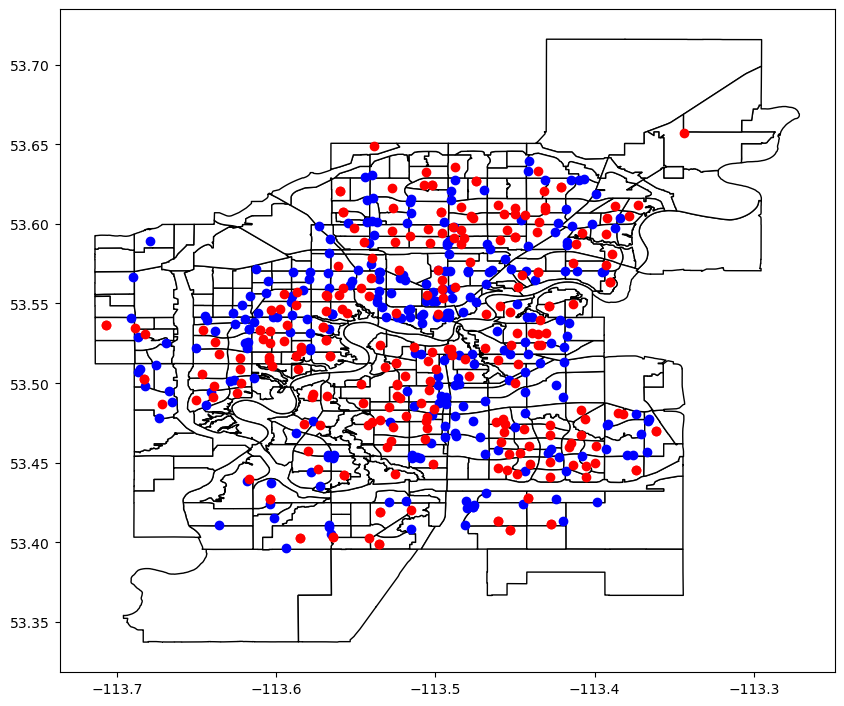

In [111]:
fig, ax = plt.subplots(figsize=(10, 10))
#schools.plot(ax=fig, color='red')
hoods.plot(ax=ax, color='white', edgecolor='black')
booze.plot(ax=ax, color='blue')
schools.plot(ax=ax, color='red')

#### Filling Areas

We can fill areas with color to show different regions, or to show different values. This can be useful for showing things like population density, or average income, or any other value that varies by region. This is pretty easy to do, we just need to specify the column that we want to use to color the regions in the 'column' parameter of the plot() function. If we pick a numerical value it'll scale the color according to the value, if we pick a categorical value it'll assign a color to each category like a regular political map. 

In [112]:
booze.head()

,Name,Business Description,Category,Zoning,Address,Neighbourhood ID,Latitude,Longitude,Point,geometry
0,CROMDALE LIQUOR STORE,Alcohol Sales,Alcohol Sales (Consumption Off Premises),"RA7, CB2",11723 - 82 STREET NW,1160,53.56965444785372,-113.4663962,POINT (-113.466396197168 53.569654447854),POINT (-113.46640 53.56965)
1,G & R LIQUOR MART,,Alcohol Sales (Consumption Off Premises),CMU,9906 - 109 STREET NW,1090,53.537570925020994,-113.5087635,POINT (-113.508763462947 53.537570925021),POINT (-113.50876 53.53757)
2,ACE LIQUOR DISCOUNTER AT SUMMERSIDE,Liquor Store,Alcohol Sales (Consumption Off Premises),CSC,1124 - 91 STREET SW,6214,53.42368025,-113.4755922,POINT (-113.475592152867 53.423680250415),POINT (-113.47559 53.42368)
3,SAFEWAY WINE & SPIRITS,Retail Liquor Store,"Alcohol Sales (Consumption Off Premises), Mino...",CSC,12807 - 140 AVENUE NW,3340,53.60105688,-113.5429659,POINT (-113.542965892923 53.601056880845),POINT (-113.54297 53.60106)
4,ACE LIQUOR DISCOUNTER AT FOREST HEIGHTS,Liquor Store,Alcohol Sales (Consumption Off Premises),DC2,7842 - 106 AVENUE NW,6230,53.54963823458446,-113.4488054,POINT (-113.448805403741 53.549638234584),POINT (-113.44881 53.54964)


<b>Note:</b> I left the warning for the CRS mismatch here. 

/Users/akeem/anaconda3/envs/ml_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<Axes: >

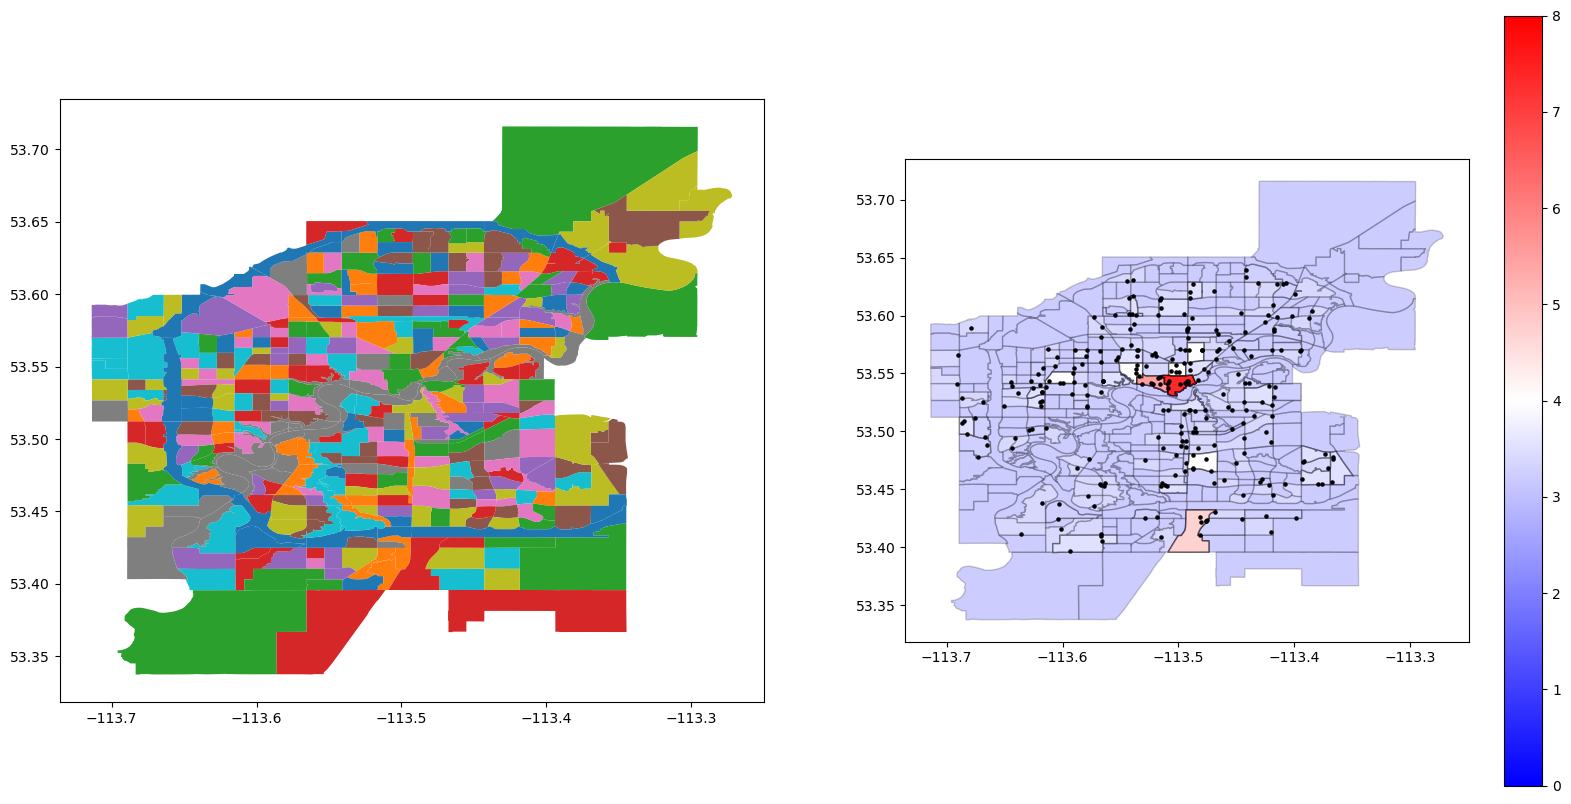

In [113]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))
hoods.plot(ax=ax[0], column="Friendly Name")

tmp = gpd.sjoin(hoods, booze, how="left", op='contains')
tmp["stores_in_hood"] = tmp.groupby('Friendly Name')['Name'].transform('count')
tmp.plot(ax=ax[1], column="stores_in_hood", legend=True, alpha=0.2, cmap='bwr', edgecolor='black')
booze.plot(ax=ax[1], color='black', markersize=5)

## All Together

We can map all of this stuff together, in general, we can layer as much information on a map as we want, or as much as looks clear and presentable. 

In [114]:

schools_catch = schools.copy()

from shapely import wkt

geom = []

for g in schools_catch["Catchment Polygon"]:
    try:
        geom.append(wkt.loads(g))
    except:
        geom.append(None)

schools_catch['geometry'] = geom
schools_catch = gpd.GeoDataFrame(schools_catch, geometry='geometry')


<Axes: >

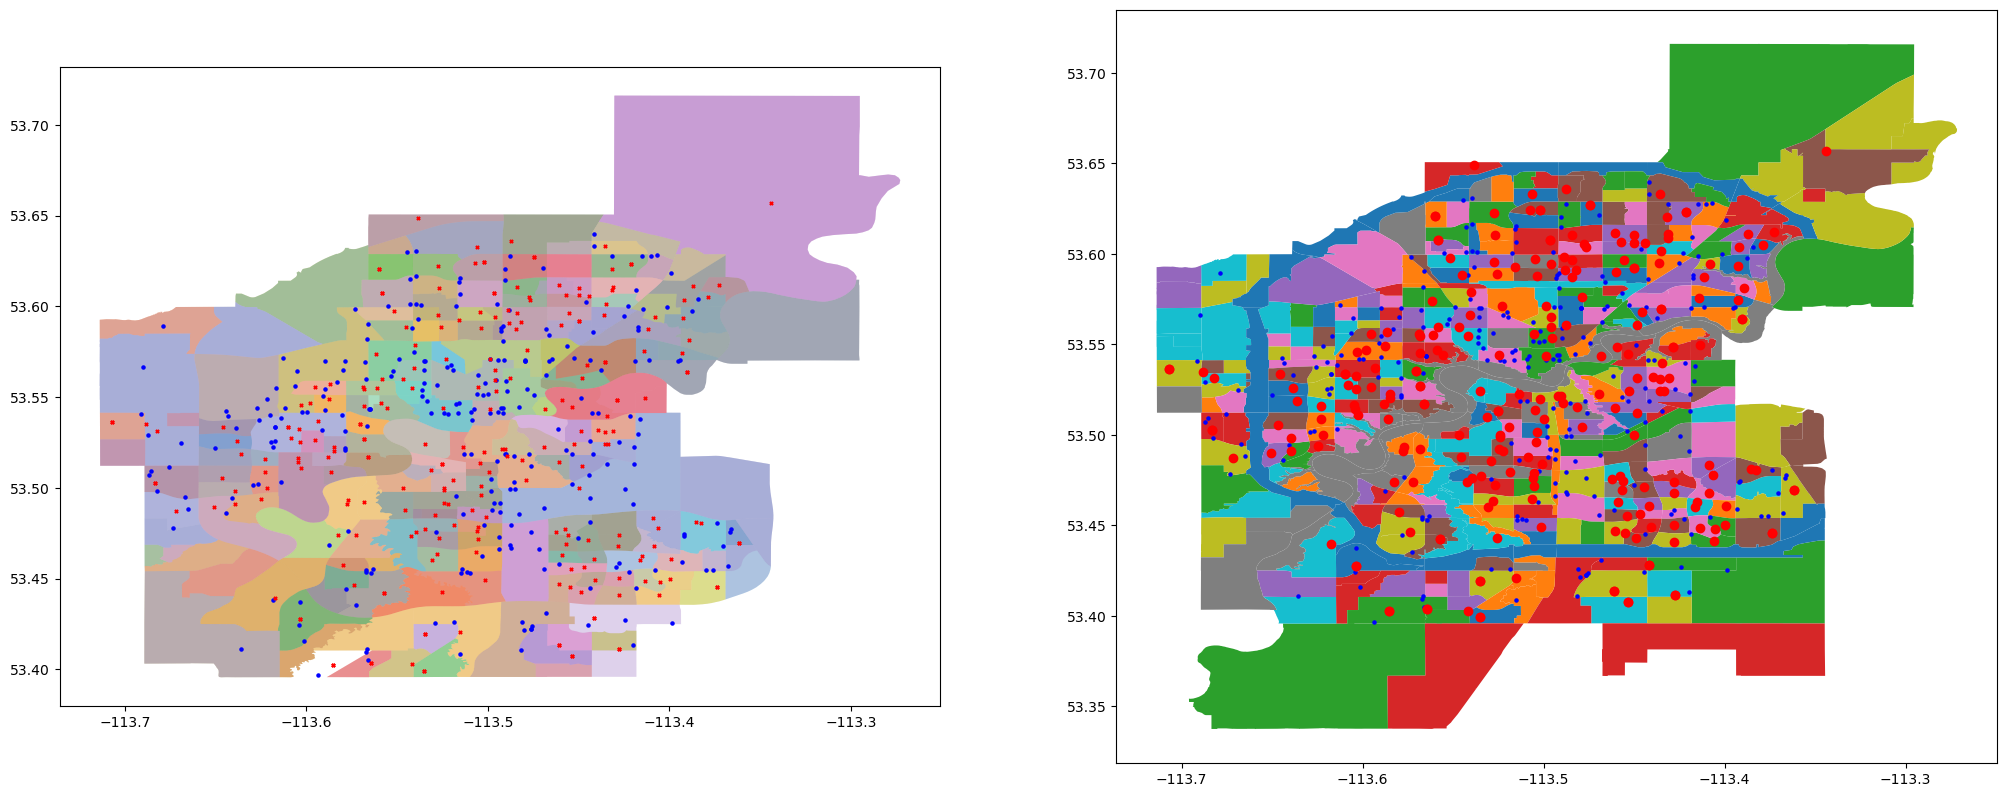

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(25, 15))

schools_catch.plot(ax=ax[0], column='School_Nam', legend=False, alpha=0.3)
hoods.plot(ax=ax[1], column="Friendly Name")

booze.plot(ax=ax[0], color='blue', markersize=5, marker='o')
schools.plot(ax=ax[0], color='red', marker = 'x', markersize=5)

booze.plot(ax=ax[1], color='blue', markersize=5)
schools.plot(ax=ax[1], color='red')

## Exercise - Map Some Stuff

Use the data provided to make some multi-layered maps. Mix it up a bit. 

In [116]:
#

## Geospatial Joins

One of the big things that spatial data allows us to do is to join data based on location, or a spatial join. This is something that is kind of intuitive - rather than using a key value being equal to join two dataframes, we can use the location of the data to join two dataframes. This is useful when we have data that is not easily joinable by a key value, but is joinable by location.

The spatial join looks for literal intersection as if we were to plot the things, and then look at their overlap. If they overlap, then they are joined. In this case, if a point is within the bounds of a neighborhood, then we've joined. By default, the joins are built on the geometry column, but we can specify a different column if we want.

For example, we can add neighborhood data to our schools or booze lists by joining them based on the location of the school or bar.

In [117]:
schools_with_hood = gpd.sjoin(schools_catch, hoods, how='inner', op='intersects')
schools_with_hood.sample(10)

/Users/akeem/anaconda3/envs/ml_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,Year,attend_no,attend,AbEd_ID,EPSB_ID,School_Nam,Sch_Type,Grades,Sch_Addres,Sch_City,...,epsb_ward,max_year,Catchment Polygon,school_location,geometry,index_right,Neighbourhood Number,Friendly Name,Description,geom
105,2021,197,Westbrook,7197.0,197.0,Westbrook,EL,K to Gr 6,11915 - 40 Avenue NW,Edmonton,...,EPSB WARD F,True,MULTIPOLYGON (((-113.5386935520857 53.47634436...,POINT (-113.53954 53.47588),"MULTIPOLYGON (((-113.53869 53.47634, -113.5387...",145,5060,Blue Quill,Blue Quill is named in honour of Cree Chief Bl...,MULTIPOLYGON (((-113.53177403944551 53.4613017...
87,2021,268,Alex Janvier,2268.0,268.0,Alex Janvier,JR,Gr 4-9,9535 167 Street NW,Edmonton,...,EPSB WARD E,True,MULTIPOLYGON (((-113.57806732261442 53.5417053...,POINT (-113.60988 53.53332),"MULTIPOLYGON (((-113.57807 53.54171, -113.5779...",84,4090,Canora,"The Canora school was opened in 1949, and the ...",MULTIPOLYGON (((-113.59036615723055 53.5495088...
188,2021,52,Queen Elizabeth,7052.0,52.0,Queen Elizabeth,SR,Gr 10-12,9425 - 132 Avenue NW,Edmonton,...,EPSB WARD A,True,MULTIPOLYGON (((-113.43623912295573 53.6505050...,POINT (-113.48828 53.59103),"MULTIPOLYGON (((-113.43624 53.65051, -113.4387...",35,3260,Lauderdale,James Lauder farmed and owned land near the ne...,MULTIPOLYGON (((-113.49194973016247 53.5890716...
157,2021,537,Spruce Avenue,7537.0,537.0,Spruce Avenue,JR,Gr 7-9,11424 - 102 Street NW,Edmonton,...,EPSB WARD C,True,MULTIPOLYGON (((-113.45437972226226 53.5816685...,POINT (-113.49616 53.56501),"MULTIPOLYGON (((-113.45438 53.58167, -113.4527...",4,1250,Westwood,The character of Westwood has changed consider...,MULTIPOLYGON (((-113.4922573373992 53.57661667...
193,2021,123,Forest Heights,7123.0,123.0,Forest Heights,EL,K to Gr 6,10304 - 81 Street NW,Edmonton,...,EPSB WARD D,True,MULTIPOLYGON (((-113.43856245214893 53.5556654...,POINT (-113.45335 53.54472),"MULTIPOLYGON (((-113.43856 53.55567, -113.4378...",294,6630,River Valley Riverside,This non-residential neighbourhood forms part ...,MULTIPOLYGON (((-113.44023852014904 53.5532593...
146,2021,551,Britannia,7551.0,551.0,Britannia,JR,Gr 7-9,16018 - 104 Avenue NW,Edmonton,...,EPSB WARD C,True,MULTIPOLYGON (((-113.55826212187046 53.5828145...,POINT (-113.59791 53.54674),"MULTIPOLYGON (((-113.55826 53.58281, -113.5570...",250,4150,Gagnon Estate Industrial,This non-residential neighbourhood is largely ...,MULTIPOLYGON (((-113.57810760696155 53.5836038...
114,2021,567,Horse Hill,7567.0,567.0,Horse Hill,EL,K to Gr 6,19355 Meridian Street N.E.,Edmonton,...,EPSB WARD B,True,MULTIPOLYGON (((-113.29549508008058 53.6723146...,POINT (-113.34373 53.65676),"MULTIPOLYGON (((-113.29550 53.67231, -113.2955...",101,2270,Evergreen,Evergreen is a mobile home park is nested in a...,MULTIPOLYGON (((-113.35655742353303 53.6286276...
252,2021,522,D S MacKenzie,7522.0,522.0,D. S. MacKenzie,JR,Gr 7-9,4020 - 106 Street NW,Edmonton,...,EPSB WARD F,True,MULTIPOLYGON (((-113.49238469970118 53.4543252...,POINT (-113.50608 53.47604),"MULTIPOLYGON (((-113.49238 53.45433, -113.4925...",148,5360,Rideau Park,"The neighbourhood is named for Rideau Hall, th...",MULTIPOLYGON (((-113.50442445325163 53.4763741...
146,2021,551,Britannia,7551.0,551.0,Britannia,JR,Gr 7-9,16018 - 104 Avenue NW,Edmonton,...,EPSB WARD C,True,MULTIPOLYGON (((-113.55826212187046 53.5828145...,POINT (-113.59791 53.54674),"MULTIPOLYGON (((-113.55826 53.58281, -113.5570...",251,4190,Hawin Park Estate Industrial,This non-residential neighbourhood is largely ...,MULTIPOLYGON (((-113.60273832064321 53.5764290...
148,2021,51,Eastglen,7051.0,51.0,Eastglen,SR,Gr 10-12,11430 - 68 Street NW,Edmonton,...,EPSB WARD D,True,MULTIPOLYGON (((-113.38125197600942 53.6290730...,POINT (-113.44550 53.56781),"MULTIPOLYGON (((-113.38125 53.62907, -113.3812...",123,2120,Canon Ridge,"Canon Ridge lies within the Hermitage area, an...",MULTIPOLYGON (((-113.38289629360258 53.5763325...


For the most direct result, now we know the neighborhood of every school. 

In [118]:
schools_with_hood.value_counts("Friendly Name")

Friendly Name
Anthony Henday South West      19
Anthony Henday Terwillegar     18
Whitemud Creek Ravine South    16
River Valley Mayfair           16
Anthony Henday South East      16
                               ..
Marquis                         3
Henderson Estates               2
Blackburne                      2
Davies Industrial West          2
Charlesworth                    1
Length: 399, dtype: int64

And if we map the results, let's limit it to one part of the city to make it more clear.

<Axes: >

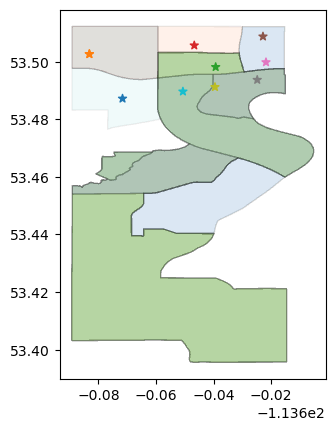

In [119]:

tmp_schools = schools_with_hood[schools_with_hood["Sector"] == "West"]
ax, fig = plt.subplots()
t1 = tmp_schools.plot(ax=fig, column='Catchment Polygon', legend=False, alpha=0.01, edgecolor='black')
schools[schools["Sector"] == "West"].plot(ax=t1, column='school_location', marker="*")


### Overlapping Areas in Joins

Another thing we can do with a join is based on areas, such as overlap. 

We can try to do a join based on overlap of the neighborhoods and the school catchment areas. 

In [120]:
hoods_with_schools = gpd.overlay(hoods[hoods["Friendly Name"]=="Crestwood"], schools_with_hood, how='intersection')
hoods_with_schools.head()

,Neighbourhood Number_1,Friendly Name_1,Description_1,geom_1,Year,attend_no,attend,AbEd_ID,EPSB_ID,School_Nam,...,epsb_ward,max_year,Catchment Polygon,school_location,index_right,Neighbourhood Number_2,Friendly Name_2,Description_2,geom_2,geometry
0,3140,Crestwood,Crestwood's unique street pattern provides exc...,MULTIPOLYGON (((-113.56750110385832 53.5385992...,2021,53,Ross Sheppard,7053.0,53.0,Ross Sheppard,...,EPSB WARD C,True,MULTIPOLYGON (((-113.67690972340294 53.4592798...,POINT (-113.55808 53.55970),2,1170,Prince Rupert,Prince Rupert lies within the old Hudson Bay C...,MULTIPOLYGON (((-113.51740826792107 53.5646264...,"POLYGON ((-113.56563 53.53795, -113.56558 53.5..."
1,3140,Crestwood,Crestwood's unique street pattern provides exc...,MULTIPOLYGON (((-113.56750110385832 53.5385992...,2021,126,Glenora,7126.0,126.0,Glenora,...,EPSB WARD C,True,MULTIPOLYGON (((-113.5375491349441 53.53850847...,POINT (-113.55548 53.54394),13,3310,North Glenora,North Glenora was part of a 900-acre farm owne...,MULTIPOLYGON (((-113.5497969638026 53.55097874...,"POLYGON ((-113.55582 53.53741, -113.55584 53.5..."
2,3140,Crestwood,Crestwood's unique street pattern provides exc...,MULTIPOLYGON (((-113.56750110385832 53.5385992...,2021,53,Ross Sheppard,7053.0,53.0,Ross Sheppard,...,EPSB WARD C,True,MULTIPOLYGON (((-113.67690972340294 53.4592798...,POINT (-113.55808 53.55970),13,3310,North Glenora,North Glenora was part of a 900-acre farm owne...,MULTIPOLYGON (((-113.5497969638026 53.55097874...,"POLYGON ((-113.56563 53.53795, -113.56558 53.5..."
3,3140,Crestwood,Crestwood's unique street pattern provides exc...,MULTIPOLYGON (((-113.56750110385832 53.5385992...,2021,543,Westminster,7543.0,543.0,Westminster,...,EPSB WARD C,True,MULTIPOLYGON (((-113.5504448143764 53.55217891...,POINT (-113.55890 53.54653),13,3310,North Glenora,North Glenora was part of a 900-acre farm owne...,MULTIPOLYGON (((-113.5497969638026 53.55097874...,"POLYGON ((-113.55582 53.53741, -113.55584 53.5..."
4,3140,Crestwood,Crestwood's unique street pattern provides exc...,MULTIPOLYGON (((-113.56750110385832 53.5385992...,2021,53,Ross Sheppard,7053.0,53.0,Ross Sheppard,...,EPSB WARD C,True,MULTIPOLYGON (((-113.67690972340294 53.4592798...,POINT (-113.55808 53.55970),18,3450,Woodcroft,"Woodcroft contains Westmount Shopping Centre, ...",MULTIPOLYGON (((-113.56570359212803 53.5690892...,"POLYGON ((-113.56563 53.53795, -113.56558 53.5..."


This result is a set of the schools with catchment area that overlap with the neighborhood of Crestwood. This is determined by plotting and finding overlap of the two areas.

<Axes: >

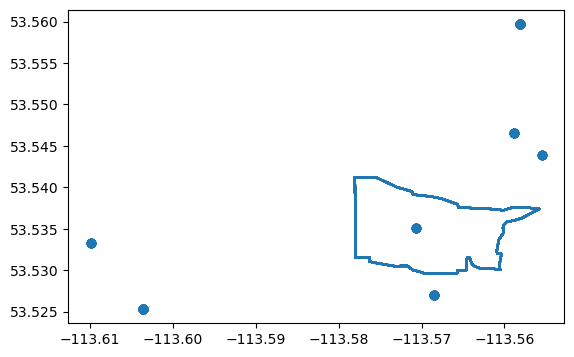

In [121]:
base_hood = hoods_with_schools.boundary.plot()
hoods_with_schools["school_location"].plot( zorder=1, ax=base_hood)

## Calculating Areas

Geospatial polygons know how big they are, we can get it in the area attribute. 

### CRS Projections

The CRS thing will impact us directly if we try to calculate anything. This is for the same basic reason that we have different projections on a map - the earth is round and the xy plane we use is flat. In short, we need to select a projection that is appropriate for the area we are working in. This is vague and confusing, but we can generally just use the default projection or look it up. For this one, I looked it up and 6933 is one that will give us results in meters, rather than degrees, like most projections.

<b>Note:</b> this projection bit is something that you'll figure out for your dataset once, and then you'll be good. We don't really worry about it much, and the details are out of scope. 

In [122]:
# convert CRS to equal-area projection
# the length unit is now `meter`
hoods.set_crs(epsg=6933, inplace=True)

,Neighbourhood Number,Friendly Name,Description,geom,geometry
0,2260,Evansdale,"Evansdale is named for H.M.E. Evans, Mayor of ...",MULTIPOLYGON (((-113.47970029870794 53.6152271...,"MULTIPOLYGON (((-113.480 53.615, -113.476 53.6..."
1,2580,Northmount,Residential land accounts for almost 70 percen...,MULTIPOLYGON (((-113.48510468465751 53.6063060...,"MULTIPOLYGON (((-113.485 53.606, -113.482 53.6..."
2,1170,Prince Rupert,Prince Rupert lies within the old Hudson Bay C...,MULTIPOLYGON (((-113.51740826792107 53.5646264...,"MULTIPOLYGON (((-113.517 53.565, -113.512 53.5..."
3,1230,Spruce Avenue,Spruce Avenue's central location has attracted...,MULTIPOLYGON (((-113.51230654891363 53.5624829...,"MULTIPOLYGON (((-113.512 53.562, -113.508 53.5..."
4,1250,Westwood,The character of Westwood has changed consider...,MULTIPOLYGON (((-113.4922573373992 53.57661667...,"MULTIPOLYGON (((-113.492 53.577, -113.492 53.5..."
...,...,...,...,...,...
394,4570,Wedgewood Heights,Most of the roads in Wedgewood Heights are nam...,MULTIPOLYGON (((-113.6513913938477 53.47496340...,"MULTIPOLYGON (((-113.651 53.475, -113.651 53.4..."
395,6070,Cloverdale,Cloverdale is situated along the south bank of...,MULTIPOLYGON (((-113.4715473884504 53.53286797...,"MULTIPOLYGON (((-113.472 53.533, -113.472 53.5..."
396,6620,River Valley Gold Bar,This non-residential neighbourhood forms part ...,MULTIPOLYGON (((-113.43880458979793 53.5536047...,"MULTIPOLYGON (((-113.439 53.554, -113.438 53.5..."
397,6180,Eastgate Business Park,This non-residential neighbourhood is largely ...,MULTIPOLYGON (((-113.39408831400553 53.5266634...,"MULTIPOLYGON (((-113.394 53.527, -113.411 53.5..."


In [123]:
hoods["area"] = hoods.area
hoods["area"] = hoods["area"] / (1000*1000)
hoods.sample(10)

,Neighbourhood Number,Friendly Name,Description,geom,geometry,area
231,3382,River Valley Laurier,This non-residential neighbourhood forms part ...,MULTIPOLYGON (((-113.57667123259607 53.5081099...,"MULTIPOLYGON (((-113.577 53.508, -113.577 53.5...",1.684394e-10
39,6600,Richfield,"Part of Mill Woods, Richfield was developed in...",MULTIPOLYGON (((-113.45661132331792 53.4651473...,"MULTIPOLYGON (((-113.457 53.465, -113.458 53.4...",1.277927e-10
93,4590,West Meadowlark Park,West Meadowlark Park was originally part of th...,MULTIPOLYGON (((-113.61530208971625 53.5267703...,"MULTIPOLYGON (((-113.615 53.527, -113.615 53.5...",1.513660e-10
333,2690,Rural North East South Sturgeon,This neighbourhood is rural in nature and prim...,MULTIPOLYGON (((-113.30790488544041 53.6383120...,"MULTIPOLYGON (((-113.308 53.638, -113.308 53.6...",2.098809e-09
244,6270,Gold Bar,"Gold Bar lies to the City's east, offering eas...",MULTIPOLYGON (((-113.41131682007924 53.5422617...,"MULTIPOLYGON (((-113.411 53.542, -113.411 53.5...",1.416514e-10
166,6441,Maple,,MULTIPOLYGON (((-113.36416282970067 53.4829896...,"MULTIPOLYGON (((-113.364 53.483, -113.364 53.4...",2.478996e-10
78,4420,Quesnell Heights,Quesnell Heights is one of the smallest reside...,MULTIPOLYGON (((-113.57667123259607 53.5081099...,"MULTIPOLYGON (((-113.577 53.508, -113.577 53.5...",2.805977e-11
94,4620,Westview Village,The Westview Village area was formerly part of...,MULTIPOLYGON (((-113.70129664818458 53.5558805...,"MULTIPOLYGON (((-113.701 53.556, -113.692 53.5...",1.255333e-10
88,6090,Coronet Addition Industrial,This non-residential neighbourhood is largely ...,MULTIPOLYGON (((-113.45752280935108 53.4986440...,"MULTIPOLYGON (((-113.458 53.499, -113.458 53.4...",5.866078e-11
120,6590,Pylypow Industrial,This non-residential neighbourhood is largely ...,MULTIPOLYGON (((-113.41427914327532 53.5067366...,"MULTIPOLYGON (((-113.414 53.507, -113.406 53.5...",4.720270e-10


## Distance

We can also calculate distance between any of our objects. 

Again, we want to set the CRS to get results in meters - this is another one that I looked up. 

In [124]:
schools_with_hood.set_crs(epsg=5234, inplace=True)
nait_lat = 53.57030
nait_long = -113.50087
nait_point = gpd.points_from_xy([nait_long], [nait_lat], crs=5234)
schools_with_hood['distance_to_nait'] = schools_with_hood["school_location"].apply(lambda x: x.distance(nait_point[0]))
schools_with_hood.sample(10).sort_values('distance_to_nait', ascending=False)

,Year,attend_no,attend,AbEd_ID,EPSB_ID,School_Nam,Sch_Type,Grades,Sch_Addres,Sch_City,...,max_year,Catchment Polygon,school_location,geometry,index_right,Neighbourhood Number,Friendly Name,Description,geom,distance_to_nait
152,2021,936,Nellie Carlson,1936.0,936.0,Nellie Carlson,EJ,K to Gr 9,4132 MacTaggart Drive NW,Edmonton,...,True,MULTIPOLYGON (((-113.54692373549102 53.4546054...,POINT (-113.55715 53.44215),"MULTIPOLYGON (((-113.547 53.455, -113.547 53.4...",327,5477,Mactaggart,The MacTaggart neighbourhood takes its name fr...,MULTIPOLYGON (((-113.55641778473152 53.4430607...,0.139968
204,2021,75,J Percy Page,7075.0,75.0,J. Percy Page,SR,Gr 10-12,2707 Millwoods Road NW,Edmonton,...,True,MULTIPOLYGON (((-113.41932530289779 53.4667345...,POINT (-113.44676 53.45640),"MULTIPOLYGON (((-113.419 53.467, -113.420 53.4...",170,6560,Papaschase Industrial,This non-residential neighbourhood is largely ...,MULTIPOLYGON (((-113.47940092762295 53.4807842...,0.126097
237,2021,249,Meyonohk,7249.0,249.0,Meyonohk,EL,K to Gr 6,1850 Lakewood Road South NW,Edmonton,...,True,MULTIPOLYGON (((-113.44806000080794 53.4584750...,POINT (-113.45404 53.45524),"MULTIPOLYGON (((-113.448 53.458, -113.444 53.4...",116,6200,Ekota,"In the Cree language, Ekota means 'special pla...",MULTIPOLYGON (((-113.45156649074288 53.4473596...,0.124229
245,2021,279,George H Luck,7279.0,279.0,George H. Luck,EL,K to Gr 6,300 Bulyea Road NW,Edmonton,...,True,MULTIPOLYGON (((-113.57335143061046 53.4251496...,POINT (-113.57237 53.47379),"MULTIPOLYGON (((-113.573 53.425, -113.571 53.4...",147,5620,Hodgson,The Hodgson neighbourhood was named after John...,MULTIPOLYGON (((-113.55491012600702 53.4613091...,0.120113
87,2021,268,Alex Janvier,2268.0,268.0,Alex Janvier,JR,Gr 4-9,9535 167 Street NW,Edmonton,...,True,MULTIPOLYGON (((-113.57806732261442 53.5417053...,POINT (-113.60988 53.53332),"MULTIPOLYGON (((-113.578 53.542, -113.578 53.5...",30,4180,Glenwood,Glenwood is a large neighbourhood in the City'...,MULTIPOLYGON (((-113.61525068337558 53.5375261...,0.115110
105,2021,197,Westbrook,7197.0,197.0,Westbrook,EL,K to Gr 6,11915 - 40 Avenue NW,Edmonton,...,True,MULTIPOLYGON (((-113.5386935520857 53.47634436...,POINT (-113.53954 53.47588),"MULTIPOLYGON (((-113.539 53.476, -113.539 53.4...",152,5280,Malmo Plains,Most of the land within the present neighbourh...,MULTIPOLYGON (((-113.51680958883705 53.4830609...,0.102032
178,2021,63,M E LaZerte,7063.0,63.0,M.E. LaZerte,SR,Gr 10-12,6804 - 144 Avenue NW,Edmonton,...,True,MULTIPOLYGON (((-113.29549508008058 53.6723146...,POINT (-113.44406 53.60575),"MULTIPOLYGON (((-113.295 53.672, -113.295 53.6...",83,2541,Miller,"Miller was named after Abe William Miller, a H...",MULTIPOLYGON (((-113.41710056979262 53.6087619...,0.066961
65,2021,126,Glenora,7126.0,126.0,Glenora,EL,K to Gr 6,13520 - 102 Avenue NW,Edmonton,...,True,MULTIPOLYGON (((-113.5375491349441 53.53850847...,POINT (-113.55548 53.54394),"MULTIPOLYGON (((-113.538 53.539, -113.539 53.5...",28,3210,Grovenor,"Lying in the City's west end, parts of Groveno...",MULTIPOLYGON (((-113.56750947303026 53.5400518...,0.060645
193,2021,123,Forest Heights,7123.0,123.0,Forest Heights,EL,K to Gr 6,10304 - 81 Street NW,Edmonton,...,True,MULTIPOLYGON (((-113.43856245214893 53.5556654...,POINT (-113.45335 53.54472),"MULTIPOLYGON (((-113.439 53.556, -113.438 53.5...",292,1190,River Valley Kinnaird,This non-residential neighbourhood forms part ...,MULTIPOLYGON (((-113.47474874026823 53.5477402...,0.053963
145,2021,544,Westmount,7544.0,544.0,Westmount,JR,Gr 7-9,11124 - 130 Street NW,Edmonton,...,True,MULTIPOLYGON (((-113.5411962230942 53.58068048...,POINT (-113.54688 53.55968),"MULTIPOLYGON (((-113.541 53.581, -113.539 53.5...",17,3350,Prince Charles,Situated on land once own by prominent citizen...,MULTIPOLYGON (((-113.53121196022207 53.5809587...,0.047223


## Exercise - Make a Map

Map the playgrounds, make it fancier in some way. 

If that works, add some distance stuff or intersections.

In [125]:
playg = gpd.read_file('../data/playgrounds.csv', geometry='Geometry Point')
playg["geometry"] = playg["Geometry Point"]
playg = playg.drop(columns=["Geometry Point"])
playg = playg.set_geometry(gpd.points_from_xy(playg['Longitude'], playg['Latitude']))
playg.head()

/var/folders/p1/m8wtcgx57417hx9d_r110ctw0000gn/T/ipykernel_68566/2640391584.py:2: UserWarning: Geometry column does not contain geometry.
  playg["geometry"] = playg["Geometry Point"]


,ID,Playground Number,Name,Address,Type,Surface Type,Accessibility,Owner,Maintainer,Redevelopment Date,Latitude,Longitude,Location,Neighbourhood ID,park_type,User Category,geometry
0,12504,631,Queen Alex Spray Park,10722 - 73 AVENUE NW,Spray Deck,Pour In Place Rubber,Wheelchair Accessible,Parks,Parks,2010-09-01,53.509733250402505,-113.5078333,"(53.509733250402505, -113.50783327300591)",5330,spray,,POINT (-113.50783 53.50973)
1,708289,3677,Cy Becker Spray Park,270 Cy Becker Boulevard NW,Spray Park,Concrete,Wheelchair Accessible,Parks,Parks,2018-09-14,53.634240728603984,-113.4070258,"(53.634240728603984, -113.40702577234134)",2611,spray,,POINT (-113.40703 53.63424)
2,12359,728,King Edward Spray Park,7708 - 85 STREET NW T6C4K9,Spray Deck,Concrete,Wheelchair Accessible,Parks,Parks,2006-09-01,53.513638813742986,-113.4609023,"(53.513638813742986, -113.46090230560588)",6360,spray,,POINT (-113.46090 53.51364)
3,12513,636,Royal Gardens Spray Park,4030 117 Street NW,Spray Deck,Concrete,Wheelchair Accessible,Parks,Parks,2001-09-13,53.47809655258378,-113.5356594,"(53.47809655258378, -113.53565943994903)",5430,spray,,POINT (-113.53566 53.47810)
4,708360,3684,York Spray Park,5825 140 Avenue NW,Spray Park,Concrete,Wheelchair Accessible,Parks,Parks,2018-09-14,53.60206178996983,-113.4312957,"(53.60206178996983, -113.43129570554564)",2720,spray,,POINT (-113.43130 53.60206)


<Axes: >

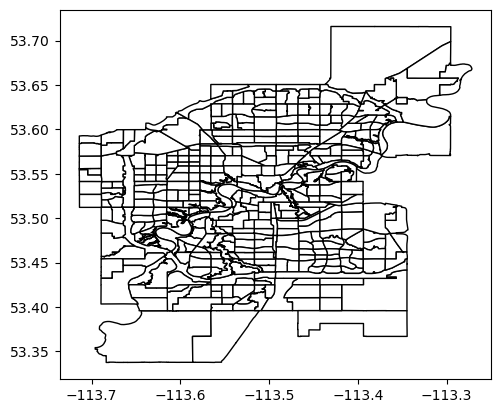

In [126]:
playg_map = hoods.plot(color='white', edgecolor='black', zorder=4)
playg.plot(ax=playg_map, color='red', markersize=5, zorder=1)

## Constructing Features

In predictive modelling, we often want to construct features that are useful for our model. We'll go over much more on what a feature is in the future, but geospatial based things like distance and size are often useful features that we can use as inputs to a model. 

We can construct features from our location data, what we want will vary depending on scenario. For example, we might want to know how far a school is from a bar, or how many corner stores are in one electoral district. We'll need to construct these features from our data, then replace the original data with the new features we've made. 

Some common things that we might want to construct are:
<ul>
<li> What region are you in - do a spatial join and attach the region label to the data. </li>
<li> How far are you from X - calculate the distance between two things. </li>
<li> How many of X are in Y - count the number of things in a region. </li>
</ul>

## Feature Construction Process

Each new feature that we want to make will be some kind of transformation of the original data, so we'll need to figure out some algorithm to calculate our new values. 

## More Efficient Construction

These kinds of universal 'prep' steps are common, and the type of action we need to take should tip you off that this is something that goes to all rows of the dataset. This is a good candidate for a function that we can apply to the entire dataset. In general, apply will process more efficiently than a loop, so we should use apply when we can, particularly with large datasets.

### Even More Efficient

We can build a tool that can apply these, or other, preparation steps to our data - in stream and automatically. This makes it way easier and is a common tool called a pipeline, which we'll look at next time. 

## Exercise - Construct Features

Try to construct a couple of features for this playground data. 

Features to add:
<ul>
<li> Distance from a set location. </li>
<li> Distance from the nearest bar. </li>
<li> Area of each region. </li>
</ul>